---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Mapping Uncertainty in ACS Data

# Table of Contents
* [Task 1: Obtaining Census Enumeration Unit GIS Boundary Data](#chapter1)
* [Task 2: Obtaining Demographic and Socioeconomic Data Tables from the US Census Bureau](#chapter2)
* [Task 3: Calculate Coefficients of Variation for ACS Data](#chapter3)
* [Task 4: Categorize Census Tracts According to Data Quality as Indicated by CVs](#chapter4)
* [Task 5: Join the File to the Florida Tracts Geometry](#chapter5)

* [Task 6: Task 6: Merge the demographic data with geometries](#chapter6)

* [Task 7:  Map the Poverty Rate Data and Include Data Quality as Indicated by CVs](#chapter7)

# American Community Survey Data, Coefficients of Variation, and Mapping Uncertainty

For the remainder of this course, students will be using demographic and socioeconomic data as we begin to learn how to analyze social vulnerability to hazards using GIS. In this week’s GIS assignment, we learn how/where to download socioeconomic and demographic data from the United States Census Bureau. 

In particular, we will use five-year data estimates from the American Community Survey for 2012-2016. This survey data can be very useful for understanding sociodemographic geographies, but users should keep in mind that it is not strictly census data, even though it is collected and maintained by the US Census Bureau.
 
As the name suggests, the American Community Survey (ACS) does not count every person in every household but contains population estimates based on survey methodology which samples approximately 1 in 40 households nationwide (more in some places, far fewer in other places). Thus, the data have margins of error associated with the population estimates.

In this experiment exercise, we will use the ACS data at the census tract level for the entire state of Florida. Students will:

-	Compare the differences between the US Census TIGER/LINE shapefiles and the IPUMS/NHGIS shapefile data.
-	Download ACS data from the Census Bureau.
-	Learn how to interpret margins of error and transform margins of error into coefficients of variation.
-	Learn how to visualize the population estimates and uncertainty in the data simultaneously.

After reviewing and following the instructions in this Word doc, go to the assignment folder for Lab 5 where you can find the assignment Word doc and the ArcGIS Pro project file for the assignment. You will perform similar tasks for the assignment using additional variables from the American Community Survey at the census tract level for the state of Florida.

Abbreviations used in the exercise:

- MOE: Margin of Error
- CV: Coefficient of Variation
- SE: Standard Error


## Task 1: Obtaining Census Enumeration Unit GIS Boundary Data <a class="anchor" id="chapter1"></a>

## Task 2: Obtaining Demographic and Socioeconomic Data Tables from the US Census Bureau <a class="anchor" id="chapter2"></a>

In [1]:
# Data analysis
import geopandas as gpd
import numpy as np
import pandas as pd

# APIs
import requests

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
import holoviews as hv
import hvplot.pandas

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = None

'cenpy' - “Explore and download data from Census APIs” 

Documentation: https://cenpy-devs.github.io/cenpy/

### Step 1: Identify what dataset we want


In [5]:
# First step: import cenpy
import cenpy
import matplotlib.pyplot as plt


In [7]:
### Step 1: Identify what dataset we want
available = cenpy.explorer.available()

available.head()

/Users/gigisung/anaconda3/envs/eda/lib/python3.12/site-packages/cenpy/explorer.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  listcols = raw_table.applymap(lambda x: isinstance(x, list)).any()


,c_isTimeseries,c_isMicrodata,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isAggregate,c_dataset,vintage
ABSCB2017,NaN,NaN,U.S. Census Bureau,2017/2017,US,006:007,2020-04-30 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.annual.survey.of.entrepreneurs@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2017/abscb', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Science Foundation. The ABS replaces the five-year Survey of Business Owners (SBO) for employer businesses, the Annual Survey of Entrepreneurs (ASE), the Business R&D and Innovation for Microbusinesses survey (BRDI-M), and the innovation section of the Business R&D and Innovation Survey (BRDI-S). https://www.census.gov/programs-surveys/abs.html",006:07,public,Economic Surveys: Annual Business Survey: Characteristics of Businesses,True,NaN,True,"(abscb,)",2017.0
ABSCB2018,NaN,NaN,U.S. Census Bureau,2018/2018,US,006:007,2020-10-26 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:Erd.annual.survey.of.entrepreneurs@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2018/abscb', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Science Foundation. The ABS replaces the five-year Survey of Business Owners (SBO) for employer businesses, the Annual Survey of Entrepreneurs (ASE), the Business R&D and Innovation for Microbusinesses survey (BRDI-M), and the innovation section of the Business R&D and Innovation Survey (BRDI-S). https://www.census.gov/programs-surveys/abs.html",006:07,public,Economic Surveys: Annual Business Survey: Characteristics of Businesses,True,NaN,True,"(abscb,)",2018.0
ABSCB2019,NaN,NaN,U.S. Census Bureau,2019/2019,US,006:007,2021-08-17 00:00:00.0,"(census,)","{'fn': 'ASE Staff', 'hasEmail': 'mailto:ERD.annual.survey.of.entrepreneurs@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2019/abscb', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Science Foundation. The ABS replaces the five-year Survey of Business Owners (SBO) for employer businesses, the Annual Survey of Entrepreneurs (ASE), the Business R&D and Innovation for Microbusinesses survey (BRDI-M), and the innovation section of the Bus

In [8]:
# Return a dataframe of all datasets that start with "ACS"
# Axis=0 means to filter the index labels!
acs = available.filter(regex="^ACS", axis=0)

acs.sort_values(by="temporal")

,c_isTimeseries,c_isMicrodata,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isAggregate,c_dataset,vintage
ACSSPP1Y2010,NaN,NaN,U.S. Census Bureau,2010/2010,United States,006:004,2020-02-13 00:00:00.0,"(census,)","{'fn': 'American Community Survey Office', 'hasEmail': 'mailto:acso.users.support@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2010/acs/acs1/spp', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","Selected Population Profiles provide broad social, economic, and housing profiles for a large number of race, ethnic, ancestry, and country/region of birth groups. The data are presented as population counts for the total population and various subgroups and percentages.",006:07,public,American Community Survey: 1-Year Estimates: Selected Population Profiles 1-Year,True,True,True,"(acs, acs1, spp)",2010.0
ACSCD1132011,NaN,NaN,U.S. Census Bureau,2011/2011,United States,006:004,2014-10-06,"(census,)","{'fn': 'American Community Survey Office', 'hasEmail': 'mailto:acso.users.support@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2011/acs1/cd113', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","The American Community Survey (ACS) is a nationwide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information throughout the decade rather than only once every 10 years. Questionnaires are mailed to a sample of addresses to obtain information about households -- that is, about each person and the housing unit itself. The American Community Survey produces demographic, social, housing and economic estimates in the form of 1-year, 3-year and 5-year estimates based on population thresholds. The strength of the ACS is in estimating population and housing characteristics. The 3-year data provide key estimates for each of the topic areas covered by the ACS for the nation, all 50 states, the District of Columbia, Puerto Rico, every congressional district, every metropolitan area, and all counties and places with populations of 20,000 or more. Although the ACS produces population, demographic and housing unit estimates,it is the Census Bureau's Population Estimates Program that produces and disseminates the official estimates of the population for the nation, states, counties, cities and towns, and estimates of housing units for states and counties. For 2010 and other decennial census years, the Decennial Census provides the official counts of population and housing units.",006:07,public,2011 American Community Survey 1-Year Profiles for the 113th Congressional Districts,True,NaN,True,"(acs1, cd113)",2011.0
ACSLANG5Y2013,NaN,NaN,U.S. Census Bureau,2013/2013,United States,006:004,2015-09-02,"(census,)","{'fn': 'Education and Social Stratification Branch', 'hasEmail': 'mailto:dsd.ferrett@census.gov'}","{'@type': 'dcat:Distribution', 'accessURL': 'http://api.census.gov/data/2013/language', 'description': 'API endpoint', 'format': 'API', 'mediaType': 'application/json', 'title': 'API endpoint'}","This data set uses the 2009-2013 American Community Survey to tabulate the number of speakers of languages spoken at home and the number of speakers of each language who speak English less than very well. These tabulations are available for the following geographies: nation; each of the 50 states, plus Washington, D.C. and Puerto Rico; counties with 100,000 or more total population and 25,000 or more speakers of languages other than English and Spanish; core-based statistical areas (metropolitan statistical areas and micropolitan statistical areas) with 100,000 or more total population and 25,000 or more speakers of languages other 

### Step 2: Initialize the API connection


In [32]:
acs = cenpy.remote.APIConnection("ACSST5Y2016")
acs.variables.head(n=10)

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN
S0804_C04_068E,Public transportation (excluding taxicab)!!Estimate!!Workers 16 years and over who did not work at home!!TIME ARRIVING AT WORK FROM HOME!!5:00 a.m. to 5:29 a.m.,MEANS OF TRANSPORTATION TO WORK BY SELECTED CHARACTERISTICS FOR WORKPLACE GEOGRAPHY,float,S0804,0,NaN,NaN,"S0804_C04_068EA,S0804_C04_068M,S0804_C04_068MA",NaN,NaN
S0503_C02_078E,Foreign born; Born in Europe!!Estimate!!INDUSTRY!!Retail trade,SELECTED CHARACTERISTICS OF THE FOREIGN-BORN POPULATION BY REGION OF BIRTH: EUROPE,float,S0503,0,NaN,NaN,"S0503_C02_078EA,S0503_C02_078M,S0503_C02_078MA",NaN,NaN
S0701PR_C01_028E,Total!!Estimate!!MARITAL STATUS!!Population 15 years and over,GEOGRAPHIC MOBILITY BY SELECTED CHARACTERISTICS IN PUERTO RICO,int,S0701PR,0,NaN,NaN,"S0701PR_C01_028EA,S0701PR_C01_028M,S0701PR_C01_028MA",NaN,NaN
S0804_C04_067E,Public transportation (excluding taxicab)!!Estimate!!Workers 16 years and over who did not work at home!!TIME ARRIVING AT WORK FROM HOME!!12:00 a.m. to 4:59 a.m.,MEANS OF TRANSPORTATION TO WORK BY SELECTED CHARACTERISTICS FOR WORKPLACE GEOGRAPHY,float,S0804,0,NaN,NaN,"S0804_C04_067EA,S0804_C04_067M,S0804_C04_067MA",NaN,NaN
S0503_C02_077E,Foreign born; Born in Europe!!Estimate!!INDUSTRY!!Wholesale trade,SELECTED CHARACTERISTICS OF THE FOREIGN-BORN POPULATION BY REGION OF BIRTH: EUROPE,float,S0503,0,NaN,NaN,"S0503_C02_077EA,S0503_C02_077M,S0503_C02_077MA",NaN,NaN
S0701PR_C01_029E,Total!!Estimate!!MARITAL STATUS!!Population 15 years and over!!Never married,GEOGRAPHIC MOBILITY BY SELECTED CHARACTERISTICS IN PUERTO RICO,int,S0701PR,0,NaN,NaN,"S0701PR_C01_029EA,S0701PR_C01_029M,S0701PR_C01_029MA",NaN,NaN
S0503_C02_076E,Foreign born; Born in Europe!!Estimate!!INDUSTRY!!Manufacturing,SELECTED CHARACTERISTICS OF THE FOREIGN-BORN POPULATION BY REGION OF BIRTH: EUROPE,float,S0503,0,NaN,NaN,"S0503_C02_076EA,S0503_C02_076M,S0503_C02_076MA",NaN,NaN


### Step 3: Find the variables we want to load


In [47]:
# Assuming 'acs' is your ACSST5Y2016 APIConnection object
variables = ["S1701_C01_001E", "S1701_C01_001M", "S1701_C02_001E", "S1701_C02_001M", "S1701_C03_001E", "S1701_C03_001M"]

# Florida's FIPS code is 12
florida_tracts = acs.query(
    cols=variables, 
    geo_unit='tract:*', 
    geo_filter={'state':'12'}
)

# Display the first few rows of the retrieved data
florida_tracts.head()


,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract
0,2504,240,224,107,8.9,4.4,12,071,001701
1,6075,590,227,210,3.7,3.4,12,071,010303
2,7342,1045,1603,772,21.8,9.4,12,071,010307
3,9873,788,1548,617,15.7,6.1,12,071,010103
4,4549,727,757,426,16.6,8.7,12,071,001801


In [48]:
florida_tracts['GEOID'] = florida_tracts['state'] + florida_tracts['county'] + florida_tracts['tract']
# florida_tracts = florida_tracts.set_index('GEOID')
florida_tracts.head()

,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract,GEOID
0,2504,240,224,107,8.9,4.4,12,071,001701,12071001701
1,6075,590,227,210,3.7,3.4,12,071,010303,12071010303
2,7342,1045,1603,772,21.8,9.4,12,071,010307,12071010307
3,9873,788,1548,617,15.7,6.1,12,071,010103,12071010103
4,4549,727,757,426,16.6,8.7,12,071,001801,12071001801


In [51]:
vars=['S1701_C01_001','S1701_C02_001','S1701_C03_001']
for i in vars:
    florida_tracts[f"{i}E"] = florida_tracts[f"{i}E"].astype('float')
    florida_tracts[f"{i}M"] = florida_tracts[f"{i}M"].astype('float')

florida_tracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S1701_C01_001E  4245 non-null   float64
 1   S1701_C01_001M  4245 non-null   float64
 2   S1701_C02_001E  4245 non-null   float64
 3   S1701_C02_001M  4245 non-null   float64
 4   S1701_C03_001E  4245 non-null   float64
 5   S1701_C03_001M  4245 non-null   float64
 6   state           4245 non-null   object 
 7   county          4245 non-null   object 
 8   tract           4245 non-null   object 
 9   GEOID           4245 non-null   object 
dtypes: float64(6), object(4)
memory usage: 331.8+ KB


In [56]:
florida_tracts.sort_values(by='S1701_C01_001E',ascending=True).head(10)

,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract,GEOID
4188,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,127,990000,12127990000
1233,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,980200,12099980200
1234,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,980400,12099980400
1235,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,980500,12099980500
2100,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,031,990000,12031990000
2099,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,980100,12099980100
1615,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,029,990000,12029990000
1236,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,990000,12099990000
1237,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,099,990100,12099990100
2644,0.0,13.0,0.0,13.0,-666666666.0,-222222222.0,12,091,990200,12091990200


In [57]:
variables = ["S1701_C01_001E", "S1701_C01_001M", "S1701_C02_001E", "S1701_C02_001M", "S1701_C03_001E", "S1701_C03_001M"]
for i in variables:
    florida_tracts[i] = florida_tracts[i].replace(0, np.nan)

florida_tracts.sort_values(by='S1701_C01_001E',ascending=True).head(10)

,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract,GEOID
466,4.0,9.0,4.0,9.0,100.0,100.0,12,087,980100,12087980100
193,6.0,9.0,4.0,6.0,66.7,66.7,12,073,001300,12073001300
465,7.0,11.0,NaN,13.0,NaN,100.0,12,087,980000,12087980000
2439,7.0,11.0,7.0,11.0,100.0,100.0,12,086,008904,12086008904
3313,12.0,18.0,NaN,13.0,NaN,95.0,12,119,980000,12119980000
1858,16.0,24.0,NaN,13.0,NaN,82.3,12,057,980500,12057980500
2387,23.0,28.0,NaN,13.0,NaN,68.6,12,119,911000,12119911000
2810,25.0,18.0,NaN,13.0,NaN,65.8,12,055,980000,12055980000
3431,32.0,52.0,32.0,52.0,100.0,58.2,12,105,980000,12105980000
3388,38.0,18.0,6.0,6.0,15.8,18.9,12,001,000902,12001000902


In [60]:
type(florida_tracts)

pandas.core.frame.DataFrame

In [61]:
florida_tracts.isnull().sum()

S1701_C01_001E    81
S1701_C01_001M     0
S1701_C02_001E    87
S1701_C02_001M     0
S1701_C03_001E     6
S1701_C03_001M     0
state              0
county             0
tract              0
GEOID              0
dtype: int64

## Task 3: Calculate Coefficients of Variation for ACS Data <a class="anchor" id="chapter3"></a>

To calculate the Standard Error (SE) and Coefficient of Variation (CV) for the variables of interest from the American Community Survey (ACS) data, we use the following formulas:

- The Standard Error (SE) can be derived from the Margin of Error (MOE) provided for each estimate. The ACS provides MOE at a 90% confidence level, which is approximately 1.645 times the standard error. Therefore, the formula to calculate the SE from the MOE is:

$$
SE = \frac{MOE}{1.645}
$$

- The Coefficient of Variation (CV) is a measure of relative variability and is calculated as the ratio of the standard error (SE) to the estimate itself, expressed as a percentage. The formula for CV is:

$$
CV = \left( \frac{SE}{Estimate} \right) \times 100
$$

For each variable of interest, we apply these formulas. Let's take the variable `S1701_C01_001E` (Estimate) and its corresponding margin of error `S1701_C01_001M` (MOE) as an example:



1. First, calculate the Standard Error (SE) for `S1701_C01_001E`:

```python
florida_tracts['S1701_C01_001E_SE'] = florida_tracts['S1701_C01_001M'] / 1.645
```

2. Then, calculate the Coefficient of Variation (CV) for S1701_C01_001E:

```python
florida_tracts['S1701_C01_001E_CV'] = (florida_tracts['S1701_C01_001E_SE'] / florida_tracts['S1701_C01_001E']) * 100
```

3. Repeat these steps for all the variables of interest.



In [62]:
florida_tracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S1701_C01_001E  4164 non-null   float64
 1   S1701_C01_001M  4245 non-null   float64
 2   S1701_C02_001E  4158 non-null   float64
 3   S1701_C02_001M  4245 non-null   float64
 4   S1701_C03_001E  4239 non-null   float64
 5   S1701_C03_001M  4245 non-null   float64
 6   state           4245 non-null   object 
 7   county          4245 non-null   object 
 8   tract           4245 non-null   object 
 9   GEOID           4245 non-null   object 
dtypes: float64(6), object(4)
memory usage: 331.8+ KB


In [63]:
vars=['S1701_C01_001','S1701_C02_001','S1701_C03_001']
for i in vars:
    florida_tracts[f"{i}_SE"] = florida_tracts[f"{i}M"] / 1.645
    florida_tracts[f"{i}_CV"] = florida_tracts[f"{i}_SE"] / florida_tracts[f"{i}E"] * 100

florida_tracts.head()

,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract,GEOID,S1701_C01_001_SE,S1701_C01_001_CV,S1701_C02_001_SE,S1701_C02_001_CV,S1701_C03_001_SE,S1701_C03_001_CV
0,2504.0,240.0,224.0,107.0,8.9,4.4,12,071,001701,12071001701,145.896657,5.826544,65.045593,29.038211,2.674772,30.053618
1,6075.0,590.0,227.0,210.0,3.7,3.4,12,071,010303,12071010303,358.662614,5.903911,127.659574,56.237698,2.066869,55.861332
2,7342.0,1045.0,1603.0,772.0,21.8,9.4,12,071,010307,12071010307,635.258359,8.652388,469.300912,29.276414,5.714286,26.212320
3,9873.0,788.0,1548.0,617.0,15.7,6.1,12,071,010103,12071010103,479.027356,4.851893,375.075988,24.229715,3.708207,23.619151
4,4549.0,727.0,757.0,426.0,16.6,8.7,12,071,001801,12071001801,441.945289,9.715218,258.966565,34.209586,5.288754,31.859963


In [41]:
florida_tracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S1701_C01_001E    4245 non-null   float64
 1   S1701_C01_001M    4245 non-null   float64
 2   S1701_C02_001E    4245 non-null   float64
 3   S1701_C02_001M    4245 non-null   float64
 4   S1701_C03_001E    4245 non-null   float64
 5   S1701_C03_001M    4245 non-null   float64
 6   state             4245 non-null   object 
 7   county            4245 non-null   object 
 8   tract             4245 non-null   object 
 9   GEOID             4245 non-null   object 
 10  S1701_C01_001_SE  4245 non-null   float64
 11  S1701_C01_001_CV  4245 non-null   float64
 12  S1701_C02_001_SE  4245 non-null   float64
 13  S1701_C02_001_CV  4245 non-null   float64
 14  S1701_C03_001_SE  4245 non-null   float64
 15  S1701_C03_001_CV  4245 non-null   float64
dtypes: float64(12), object(4)
memory usage: 53

In [64]:
florida_tracts.isnull().sum()

S1701_C01_001E      81
S1701_C01_001M       0
S1701_C02_001E      87
S1701_C02_001M       0
S1701_C03_001E       6
S1701_C03_001M       0
state                0
county               0
tract                0
GEOID                0
S1701_C01_001_SE     0
S1701_C01_001_CV    81
S1701_C02_001_SE     0
S1701_C02_001_CV    87
S1701_C03_001_SE     0
S1701_C03_001_CV     6
dtype: int64

array([[<Axes: title={'center': 'S1701_C01_001E'}>,
        <Axes: title={'center': 'S1701_C01_001M'}>,
        <Axes: title={'center': 'S1701_C02_001E'}>],
       [<Axes: title={'center': 'S1701_C02_001M'}>,
        <Axes: title={'center': 'S1701_C03_001E'}>,
        <Axes: title={'center': 'S1701_C03_001M'}>],
       [<Axes: title={'center': 'S1701_C01_001_SE'}>,
        <Axes: title={'center': 'S1701_C01_001_CV'}>,
        <Axes: title={'center': 'S1701_C02_001_SE'}>],
       [<Axes: title={'center': 'S1701_C02_001_CV'}>,
        <Axes: title={'center': 'S1701_C03_001_SE'}>,
        <Axes: title={'center': 'S1701_C03_001_CV'}>]], dtype=object)

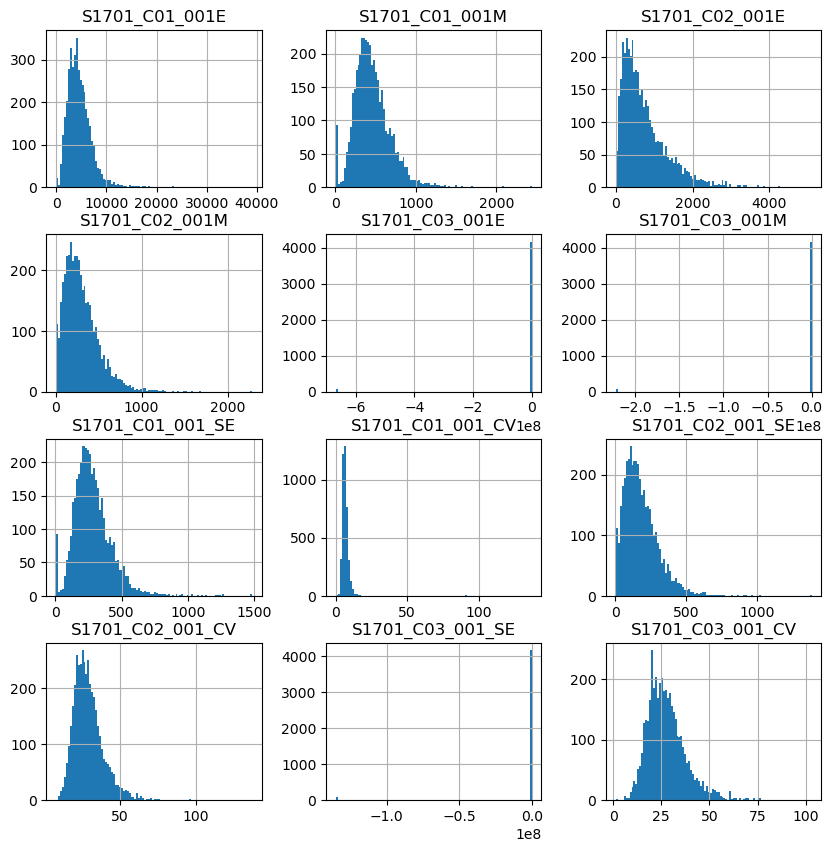

In [66]:
florida_tracts.hist(bins=100, figsize=(10,10))

## Task 4: Categorize Census Tracts According to Data Quality as Indicated by CVs <a class="anchor" id="chapter4"></a>

In [70]:
for i in vars:
    conditions = [
        (florida_tracts[f"{i}_CV"] < 0),
        (florida_tracts[f"{i}_CV"] < 12),
        (florida_tracts[f"{i}_CV"] < 40),
        (florida_tracts[f"{i}_CV"] >= 40)
    ]
    
    # Define choices corresponding to each condition
    choices = ["No CV", "High", "Medium", "Low"]
    
    # Use np.select to apply conditions and choices to the dataframe
    florida_tracts[f"{i}_rating"] = np.select(conditions, choices, default=np.nan)

florida_tracts.head()

,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,state,county,tract,GEOID,S1701_C01_001_SE,S1701_C01_001_CV,S1701_C02_001_SE,S1701_C02_001_CV,S1701_C03_001_SE,S1701_C03_001_CV,S1701_C01_001_rating,S1701_C02_001_rating,S1701_C03_001_rating
0,2504.0,240.0,224.0,107.0,8.9,4.4,12,071,001701,12071001701,145.896657,5.826544,65.045593,29.038211,2.674772,30.053618,High,Medium,Medium
1,6075.0,590.0,227.0,210.0,3.7,3.4,12,071,010303,12071010303,358.662614,5.903911,127.659574,56.237698,2.066869,55.861332,High,Low,Low
2,7342.0,1045.0,1603.0,772.0,21.8,9.4,12,071,010307,12071010307,635.258359,8.652388,469.300912,29.276414,5.714286,26.212320,High,Medium,Medium
3,9873.0,788.0,1548.0,617.0,15.7,6.1,12,071,010103,12071010103,479.027356,4.851893,375.075988,24.229715,3.708207,23.619151,High,Medium,Medium
4,4549.0,727.0,757.0,426.0,16.6,8.7,12,071,001801,12071001801,441.945289,9.715218,258.966565,34.209586,5.288754,31.859963,High,Medium,Medium


In [75]:
florida_tracts.to_csv('florida_tracts.csv')

## Task 5: Join the File to the Florida Tracts Geometry <a class="anchor" id="chapter5"></a>

In [73]:
acs.geographies['fips']


,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2016-01-01,NaN,NaN,NaN
1,region,020,2016-01-01,NaN,NaN,NaN
2,division,030,2016-01-01,NaN,NaN,NaN
3,state,040,2016-01-01,NaN,NaN,NaN
4,county,050,2016-01-01,[state],[state],state
5,county subdivision,060,2016-01-01,"[state, county]",[county],county
6,subminor civil division,067,2016-01-01,"[state, county, county subdivision]",NaN,NaN
7,tract,140,2016-01-01,"[state, county]",[county],county
8,place,160,2016-01-01,[state],[state],state
9,consolidated city,170,2016-01-01,[state],[state],state


In [76]:
counties = cenpy.explorer.fips_table("COUNTY")
counties.head()


,0,1,2,3,4
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1


In [77]:
import pygris


In [78]:
pygris.tracts?


Signature:
pygris.tracts(
    state=None,
    county=None,
    cb=False,
    year=None,
    cache=False,
    subset_by=None,
)
Docstring:
 Load a Census tracts shapefile into Python as a GeoDataFrame

Parameters
----------
state : str 
    The state name, state abbreviation, or two-digit FIPS code of the desired state. 
    If None, Census tracts for the entire United States will be downloaded if available for that 
    year / dataset combination.  
county : str
    The county name or three-digit FIPS code of the desired county. If None, Census tracts
    for the selected state will be downloaded. 
cb : bool 
    If set to True, download a generalized (1:500k) cartographic boundary file.  
    Defaults to False (the regular TIGER/Line file).
year : int 
    The year of the TIGER/Line or cartographic boundary shapefile. 
cache : bool 
    If True, the function will download a Census shapefile to a cache directory 
    on the user's computer for future access.  If False, the function wil

Using FIPS code '12' for input 'FL'


<Axes: >

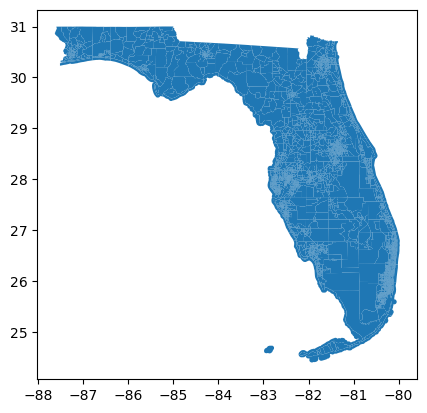

In [81]:
fl_tracts_geo=pygris.tracts(
    state="FL",
    year=2016,
)

fl_tracts_geo.plot()

In [82]:
len(fl_tracts_geo)

4245

In [83]:
fl_tracts_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   4245 non-null   object  
 1   COUNTYFP  4245 non-null   object  
 2   TRACTCE   4245 non-null   object  
 3   GEOID     4245 non-null   object  
 4   NAME      4245 non-null   object  
 5   NAMELSAD  4245 non-null   object  
 6   MTFCC     4245 non-null   object  
 7   FUNCSTAT  4245 non-null   object  
 8   ALAND     4245 non-null   int64   
 9   AWATER    4245 non-null   int64   
 10  INTPTLAT  4245 non-null   object  
 11  INTPTLON  4245 non-null   object  
 12  geometry  4245 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 431.3+ KB


## Task 6: Merge the demographic data with geometries   <a class="anchor" id="chapter6"></a>


In [84]:
florida_demo_final=fl_tracts_geo.merge(
    florida_tracts, 
    on='GEOID')

<Axes: >

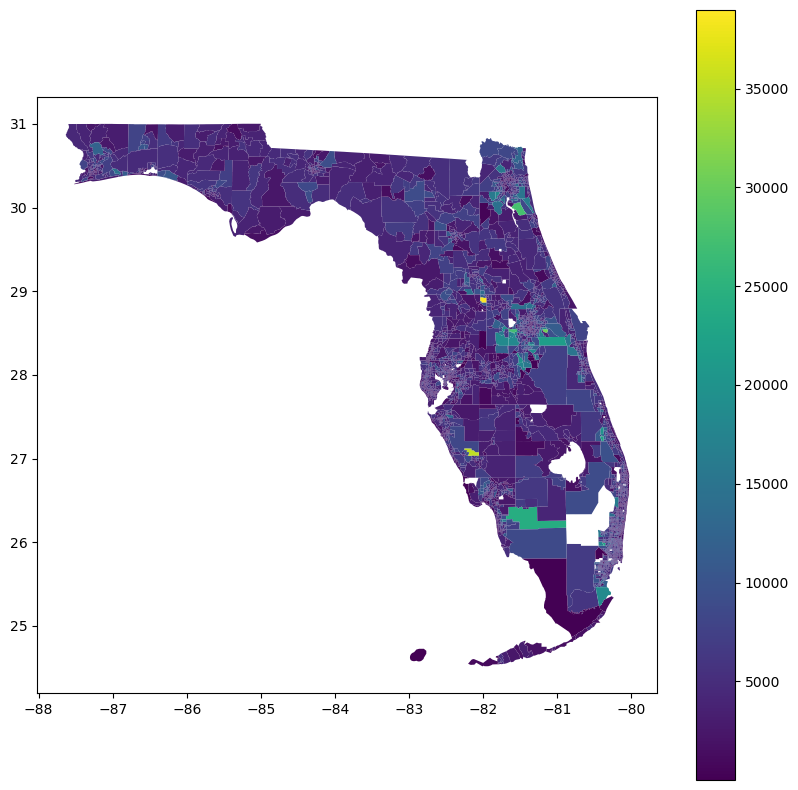

In [86]:
florida_demo_final.plot(column='S1701_C01_001E', legend=True, figsize=(10,10))

## Task 7: Map the Poverty Rate Data and Include Data Quality as Indicated by CVs <a class="anchor" id="chapter7"></a>

For this visualization, we'll focus on mapping the poverty rate using a graduated color scheme based on S1701_C01_001E and overlaying this with hatched patterns based on S1701_C01_001_rating to indicate data quality. 

We'll adjust transparency as needed to make both layers visible and interpretable.



In [87]:
florida_demo_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   STATEFP               4245 non-null   object  
 1   COUNTYFP              4245 non-null   object  
 2   TRACTCE               4245 non-null   object  
 3   GEOID                 4245 non-null   object  
 4   NAME                  4245 non-null   object  
 5   NAMELSAD              4245 non-null   object  
 6   MTFCC                 4245 non-null   object  
 7   FUNCSTAT              4245 non-null   object  
 8   ALAND                 4245 non-null   int64   
 9   AWATER                4245 non-null   int64   
 10  INTPTLAT              4245 non-null   object  
 11  INTPTLON              4245 non-null   object  
 12  geometry              4245 non-null   geometry
 13  S1701_C01_001E        4164 non-null   float64 
 14  S1701_C01_001M        4245 non-null   float64 
 

- S1701_C01_001E: poverty ref population estimate
- S1701_C02_001E: poverty population estimate
- S1701_C03_001E: percentage of poverty population estimate

In [1]:
# florida_demo_final.explore(column="S1701_C01_001E", tiles="CartoDB positron")


### Step 1: Visualize Poverty Rates
First, we'll plot the poverty rates with a graduated color scheme. Since we want a red color scheme, we'll use a colormap ranging from light to dark red to represent increasing poverty rates. We'll make this layer less transparent to keep it visible under the data quality overlay.


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

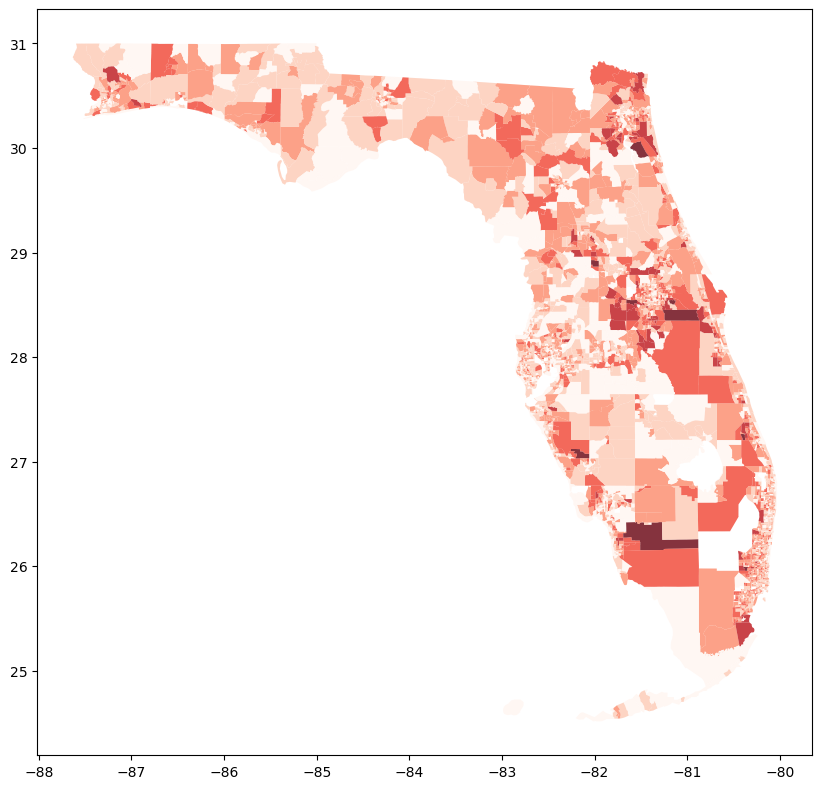

In [90]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Step 1: Plot poverty rates
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
florida_demo_final.plot(column='S1701_C01_001E', ax=ax, legend=True,
                        legend_kwds={'label': "Poverty Rate (%)", 'orientation': "horizontal"},
                        cmap='Reds', scheme='NaturalBreaks', k=6, edgecolor='none', alpha=0.8)

# Adjust as necessary for your dataset and preferences
plt.title('Florida Poverty Rates & Data Quality')
plt.axis('off')

# Placeholder for Step 2: This will involve plotting the data quality overlay
# This step will be added after explaining the logic for data quality visualization

plt.show()

### Step 2: Overlay Data Quality Information
Next, we'll add the data quality overlay. For this, we'll categorize the tracts based on their S1701_C01_001_rating and use hatched fills to indicate the quality. Different hatch patterns (or colors) will be used for "High", "Medium", "Low", and "No CV" categories. This layer will be more transparent so the poverty rates underneath are still visible.


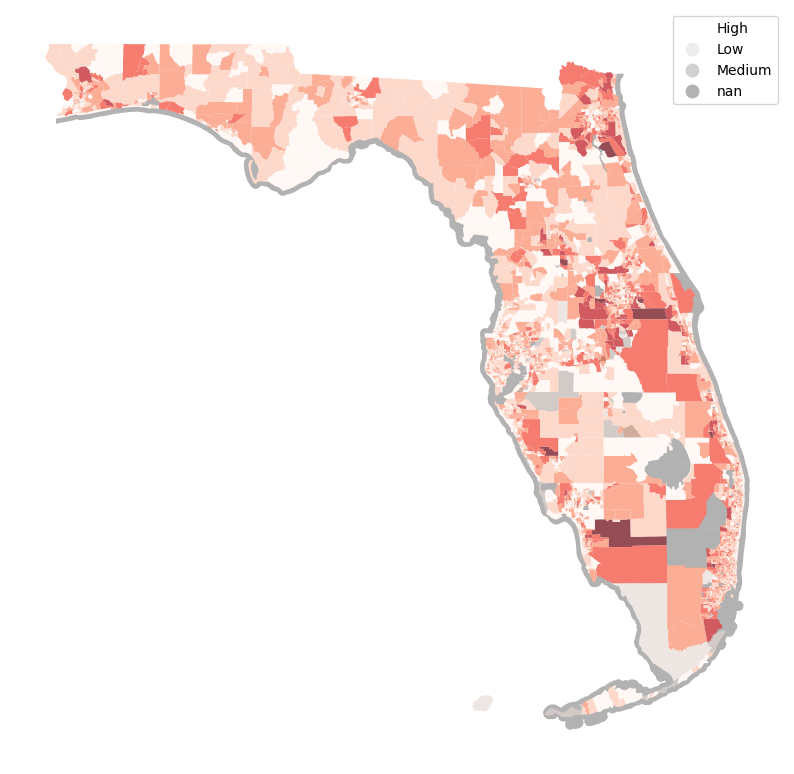

In [97]:
florida_demo_final['S1701_C01_001_rating'] = florida_demo_final['S1701_C01_001_rating'].astype('category')
florida_demo_final['S1701_C01_001_rating'].cat.set_categories(['High', 'Medium', 'Low', 'No CV'], ordered=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
florida_demo_final.plot(column='S1701_C01_001E', ax=ax, legend=True,
                        # legend_kwds={'label': "Poverty Rate (%)", 'orientation': "horizontal"},
                        cmap='Reds', scheme='NaturalBreaks', k=6, edgecolor='none')

# Overlap with color intensity for uncertainty
florida_demo_final.plot(column='S1701_C01_001_rating', ax=ax, legend=True,
                        cmap='Greys', alpha=0.3, edgecolor='none')  # Using greyscale for simplicity

plt.axis('off')
plt.show()